In [119]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import utils
from astropy import stats
from photutils import CircularAnnulus, CircularAperture
from photutils.aperture import aperture_photometry as aper_sum
import numpy as np
#import matplotlib.colors as colors

In [2]:
fits_image_filename='SVS13.fits'

In [6]:
hdul = fits.open(fits_image_filename)
w=WCS(hdul[0].header)
data = hdul[0].data
hdul.close()

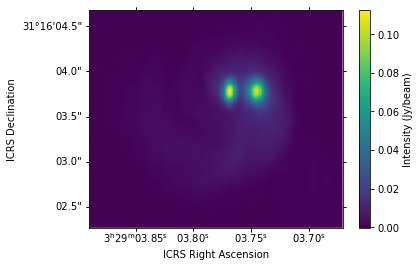

In [9]:
plt.clf()
plt.subplot(projection=w)
plt.imshow(data)
plt.xlabel('ICRS Right Ascension')
plt.ylabel('ICRS Declination')
cbar=plt.colorbar()
cbar.set_label('Intensity (Jy/beam)', rotation=90)
plt.show()

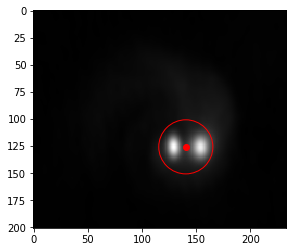

In [65]:
#I'm going to average in annulus centered in (ar,dec), with radius greater than r (in px). 
ar='+03h29m03.758s' #right ascension of central (red) point
dec='+31d16m3.78s' #declination of central (red) point
r = 25 # radius of the (red) circle in pixels 
orig_coord = SkyCoord(ar,dec,frame='icrs')
orig_pix = utils.skycoord_to_pixel(orig_coord,w)
orig_x, orig_y = zip(orig_pix)
plt.imshow(data, cmap='gray')
plt.plot(orig_x,orig_y, 'ro')
circle1 = plt.Circle(orig_pix, r, color='r',fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle1)
plt.show()

In [113]:
width=5 #width of the annulus in pixels

In [ ]:
aper = CircularAnnulus(orig_pix, r, r+width)
tab=aper_sum(data,aper)
ave=tab['aperture_sum'][0]/aper.area

In [ ]:
r_in=range(r,) 

In [129]:
list(data.shape)+list(orig_pix)

[201, 234, array(140.45248326), array(125.66666729)]

(array(140.45248326), array(125.66666729))

In [122]:
y

(array(125.66666729),)